In [3]:
import numpy as np
import matplotlib.pylab as plt
import pickle

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

- 神经网络的学习。这里所说的“学习”是指从训练数据中自动获取最优权重参数的过程。
- 为了使神经网络能进行学习，将导入损失函数这一指标。
- 学习的目的就是以该损失函数为基准，找出能使它的值达到最小的权重参数。
- 为了找出尽可能小的损失函数的值，本章我们将介绍利用了函数斜率的梯度法。

# 从数据中学习

所谓“从数据中学习”，是指可以由数据自动决定权重参数的值。

## 数据驱动

神经网络或深度学习则比以往的机器学习方法更能避免人为介入。与待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端”的学习。

**传统机器学习步骤：**人为设计一些特征值，再通过机器学习SVM，KNN 来实现；

**神经网络学习步骤：**直接学习图像本身

<img src="img/4_2.png" alt="Drawing" style="width: 500px;"/>


神经网络的优点是对所有的问题都可以用同样的流程来解决。比如，不管要求解的问题是识别5，还是识别狗，抑或是识别人脸，神经网络都是通过不断地学习所提供的数据，尝试发现待求解的问题的模式。也就是说，与待处理的问题无关，神经网络可以将数据直接作为原始数据，进行“端对端”的学习。


## 训练数据和测试数据

机器学习中，一般将数据分为训练数据和测试数据两部分来进行学习和实验等。首先，使用训练数据进行学习，寻找最优的参数；然后，使用测试数据评价训练得到的模型的实际能力。为什么需要将数据分为训练数据和测试数据呢？因为我们追求的是模型的泛化能力。为了正确评价模型的泛化能力，就必须划分训练数据和测试数据。另外，训练数据也可以称为监督数据。


$X_1$, $Y_1$ 为 **训练数据**

$X_2$， $Y_2$ 为 **测试数据**

|$Y_{1} - Y_{p}$| 为 **损失函数**


# 损失函数

- 神经网络的学习通过某个指标表示现在的状态。然后，以这个指标为基准，寻找最优权重参数。

- 神经网络以某个指标为线索寻找最优权重参数

- 神经网络的学习中所用的指标称为损失函数（loss function）。

- 损失函数是表示神经网络性能的“恶劣程度”的指标，即当前的神经网络对监督数据在多大程度上不拟合，在多大程度上不一致

- 这个损失函数可以使用任意函数，但一般用均方误差和交叉熵误差等。



## 均方误差MSE（mean squared error）

**公式** ：$E = \frac{1}{2}\sum\limits_k(y_k - t_k)^2 $

$y_k$是表示神经网络的输出，$t_k$表示监督数据，k表示数据的维数


In [2]:
# 在节手写数字识别的例子中，yk、tk是由如下10个元素构成的数据。

# 例1：“2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 0~9 数字的概率
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 设“2”为正确解

# 关于y：
# 数组元素的索引从第一个开始依次对应数字“0”“1”“2”…… 
# 这里，神经网络的输出y是softmax函数的输出。
# 由于softmax函数的输出可以理解为概率，
# 因此上例表示“0”的概率是0.1，“1”的概率是0.05，“2”的概率是0.6等。

# 关于t：
# t是监督数据，将正确解标签设为1，其他均设为0。
# 这里，标签“2”为1，表示正确解是“2”。
# 将正确解标签表示为1，其他标签表示为0的表示方法称为one-hot表示。

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

error = mean_squared_error(np.array(y), np.array(t))

# 这里是error，越小说明误差越小，表示结果越准；
print(error)


0.09750000000000003


In [4]:
 # 例2：t不变，修改y：“7”的概率最高的情况（0.6）,t 的正确解还是2
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y2), np.array(t))


0.5975

## 交叉熵误差(cross entropy error)

**公式：** $E = -\sum\limits_k t_k log y_k $


- log表示以e为底数的自然对数（$log_e$）, $y_k$是神经网络的输出，$t_k$是正确解标签。

- $t_k$中只有正确解标签的索引为1，其他均为0（one-hot表示）。

- 因此，**交叉熵公式实际上只计算对应正确解标签的输出的自然对数。**

比如，假设正确解标签的索引是“2”，与之对应的神经网络的输出是0.6，则交叉熵误差是−log 0.6 = 0.51；
若“2”对应的输出是0.1，则交叉熵误差为−log 0.1 = 2.30。也就是说，交叉熵误差的值是由正确解标签所对应的输出结果决定的。

<ipython-input-105-102c02e36cda>:7: RuntimeWarning: divide by zero encountered in log
  y = -np.log(x)


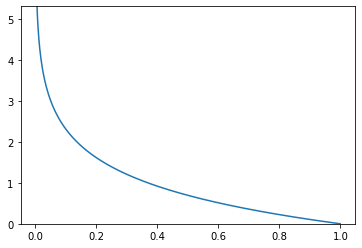

In [105]:
# 看一下-log(x) 函数图像：x轴正确解标签对应的输出越大，交叉熵误差值越接近0，说明误差越小
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0, 1, 0.001)
y = -np.log(x)

plt.plot(x, y)
plt.ylim(0, 5.3)
plt.show()

# 从图像来看，交叉熵误差最大值是到正无穷的，这就会出现下面 error=2.3，这个不是我们理解的fa

对应到公式中：$E = -\sum\limits_k t_k log y_k $

正确解标签对应的输出越大，公式中的值越接近0（也就是误差越小）。以至于当输出为1时，交叉熵误差E为0。

如果正确解标签对应的输出较小，则公式的值较大，则误差E越大。

In [5]:
# 代码实现交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 函数内部在计算np.log时，加上了一个极小值delta。
# 这是因为，当出现np.log(0)时，np.log(0)会变为负无限大的-inf，这样一来就会导致后续计算无法进行。
# 作为保护性对策，添加一个微小值可以防止负无限大的发生。

In [7]:
# 第一个例子，正确解标签对应的输出为0.6，此时的交叉熵误差大约为0.51

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
error = cross_entropy_error(np.array(y), np.array(t))
print(error)



0.510825457099338


In [8]:
# 第二个例子，正确解标签对应的输出为0.1的低值，此时的交叉熵误差大约为2.3

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
error = cross_entropy_error(np.array(y), np.array(t))
print(error)
print(1-error)
# 误差为 2.3



2.302584092994546
-1.3025840929945458


In [9]:
# 详细解读：-np.sum(t * np.log(y + delta))
# 证明：交叉熵公式实际上只计算对应正确解标签的输出的自然对数。
delta = 1e-7
print(np.log(np.array(y) + delta))

print(np.array(t)*np.log(np.array(y) + delta))

print(-np.sum(np.array(t)*np.log(np.array(y) + delta)))


[ -2.30258409  -2.99573027  -2.30258409 -16.11809565  -2.99573027
  -2.30258409 -16.11809565  -0.51082546 -16.11809565 -16.11809565]
[-0.         -0.         -2.30258409 -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]
2.302584092994546


## mini-batch学习

神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小批量），然后对每个mini-batch进行学习。

比如，从60000个训练数据中随机选择100笔，再用这100笔数据进行学习。这种学习方式称为**mini-batch学习**。



在 mini-batch中会计算“平均损失函数”：

**公式：**$E = \frac{1}{N}\sum\limits_{n} \sum\limits_{k} t_{nk} log y_{nk} $

公式说明：把全部的交叉熵误差累加，再除以N

这里，假设数据有N个，$t_{nk}$表示第n个数据的第k个元素的值（$y_{nk}$是神经网络的输出，$t_{nk}$是监督数据）。

其实只是把求单个数据的损失函数扩大到了N份数据，最后除以N进行正规化。


### mini-batch版交叉熵误差的实现

In [15]:
# mini-batch版交叉熵误差的实现
def cross_entropy_error(y, t):
    if y.ndim == 1: # 如果是一维数组，变成二维数据；
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 非batch：-np.sum(t * np.log(y + 1e-7))
# 其中，1e-7 为极小值，如果不加这个值，当y=0的时候，log返回的结果是无穷大。会报错！


# 当监督数据是标签形式（非one-hot表示，而是像“2”“7”这样的标签）时，交叉熵误差可通过如下代码实现：
def cross_entropy_error2(y, t):
    if y.ndim == 1: # 如果是一维数组，变成二维数据；
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size



这里，y是神经网络的输出，t是监督数据。

y的维度为1时，即求单个数据的交叉熵误差时，需要改变数据的形状？这里因为：return 返回的维度要一致，供后续使用；

并且，当输入为mini-batch时，要用batch的个数进行正规化，计算单个数据的平均交叉熵误差。

In [6]:
# 代码解释1： -np.sum(t * np.log(y + 1e-7)) / batch_size
batch_size = 4
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t1 = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y2 = y1.reshape(1, y1.size)
t2 = t1.reshape(1, t1.size)

print(np.log(y2 + 1e-7))
print(t2 * np.log(y2 + 1e-7))
print(-np.sum(t2 * np.log(y2 + 1e-7))/ batch_size)
# -(-0.51082546-0.51082546-2.30258409-2.30258409)/4 = 5.6268191/4 = 1.406704775046942


[[ -2.30258409  -2.99573027  -0.51082546 -16.11809565  -2.99573027
   -2.30258409 -16.11809565  -2.30258409 -16.11809565 -16.11809565]]
[[-0.         -0.         -0.51082546 -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]]
0.1277063642748345


In [24]:
# 代码解释2： -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size
# 结果
y3 = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
               [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])
# 这里把y2中的值稍加改动；
t3 = np.array([2,2,2,2])
batch_size = y3.shape[0]


# 最终输出：
y3.shape[0]
np.arange(batch_size)
y3[np.arange(batch_size), t3]
np.log(y3[np.arange(batch_size), t3]+ 1e-7)
-np.sum(np.log(y3[np.arange(batch_size), t3] + 1e-7))/batch_size


4

array([0, 1, 2, 3])

array([0.6, 0.6, 0.1, 0.1])

array([-0.51082546, -0.51082546, -2.30258409, -2.30258409])

1.406704775046942

In [36]:
# 测试1：
# y为1维：
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

y1.shape# 这里还是一维数组；
t1 = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

t1 * np.log(y1 + 1e-7)

cross_entropy_error(y1, t1)


(10,)

array([-0.        , -0.        , -0.51082546, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

0.0510825457099338

In [35]:
# 测试2：
# 对y1进行reshape
y2 = y1.reshape(1, y1.size)
y2.shape
t2 = t1.reshape(1, t1.size)
t2.shape

t2 * np.log(y2 + 1e-7)
-np.sum(t2 * np.log(y2 + 1e-7))/10


(1, 10)

(1, 10)

array([[-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

0.0510825457099338

In [37]:
# 测试3：
# y为二维
y3 = np.array([[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
               [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0],
               [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]])
# 这里把y2中的值稍加改动；

t3 = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

t3 * np.log(y3 + 1e-7)

cross_entropy_error(y3, t3)


array([[-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.51082546, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -2.30258409, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -2.30258409, -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

0.5626819100187768

### 回到MNIST数据集 的例子，我们取数来看下


In [25]:
# 回到MNIST数据集 的例子，我们取数来看下，

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)


(60000, 784)
(60000, 10)


读入MNIST数据后，训练数据有60000个，输入数据是784维 （28 × 28）的图像数据，监督数据是10维的数据。因此，上面的x_train、t_
train的形状分别是(60000, 784)和(60000, 10)。

In [26]:
# 从这个训练数据中随机抽取10笔数据
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 从0到59999之间随机选择10个数字
print(train_size)
print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
# print(x_batch)
# print(t_batch)

60000
[38431 24331 18495 12738 38490 43354 18561 10559  5335 14624]


In [27]:
x_batch.shape

x_batch[0].shape

# 使用np.random.choice()可以从指定的数字中随机选择想要的数字。比如，np.random.choice(60000, 10)会从0到59999之间随机选择10个数字。
np.random.choice(60000, 10)


(10, 784)

(784,)

array([ 6436, 59163, 27379, 23939, 43137, 54644, 39890, 22742, 31197,
        2649])

之后，我们只需指定这些随机选出的索引，取出mini-batch，然后使用这个mini-batch计算损失函数即可。

### 思考：为何要设定损失函数？

在进行神经网络的学习时，不能将识别精度作为指标。因为**如果以识别精度为指标，则参数的导数在绝大多数地方都会变为0。**

#### 为什么用识别精度作为指标时，参数的导数在绝大多数地方都会变成0？
答案：假设某个神经网络正确识别出了100笔训练数据中的32笔，此时识别精度为32 %。如果以识别精度为指标，即使稍微改变权重参数的值，识别精度也仍将保持在32 %，不会出现变化。也就是说，仅仅微调参数，是无法改善识别精度的。即便识别精度有所改善，它的值也不会像32.0123 ... %这样连续变化，而是变为33 %、34 %这样的不连续的、离散的值。而如果把损失函数作为指标，则当前损失函数的值可以表示为0.92543 ... 这样的值。并且，如果稍微改变一下参数的值，对应的损失函数也会像0.93432 ... 这样发生连续性的变化。

<img src="img/4_4.png" alt="Drawing" style="width: 500px;"/>

识别精度对微小的参数变化基本上没有什么反应，即便有反应，它的值也是不连续地、突然地变化。
作为激活函数的阶跃函数也有同样的情况。出于相同的原因，如果使用阶跃函数作为激活函数，神经网络的学习将无法进行。

如上图所示，阶跃函数的导数在绝大多数地方（除了0以外的地方）均为0。
也就是说，如果使用了阶跃函数，那么即便将损失函数作为指标，参数的微小变化也会被阶跃函数抹杀，导致损失函数的值不会产生任何变化。

而sigmoid函数，不仅函数的输出（竖轴的值）是连续变化的，曲线的斜率（导数）也是连续变化的。也就是说，sigmoid函数的导数在任何地方都不为0。这对神经网络的学习非常重要。得益于这个斜率不会为0的性质，神经网络的学习得以正确进行。

# 数值微分


## 导数
导数就是表示某个瞬间的变化量。它可以定义成下面的式子。

$$\frac{df(x)}{dx}= \lim\limits_{h\rightarrow0}\frac{f(x+h)-f(x)}{h} $$



In [138]:
# 中心差分实现数值微分

def numerical_diff(f, x):
    h = 1e-4 # 0.0001,使用过小的值会造成计算机出现计算上的问题，发生“舍入误差”，反而舍入为0.0
    return (f(x+h) - f(x-h)) / (2*h)


利用微小的差分求导数的过程称为数值微分，如以上的 numerical_diff 计算结果；--- 近似导数

而基于数学式的推导求导数的过程，则用“解析性”（analytic）一词，称为“解析性求解”或者“解析性求导”。--- “真的导数”

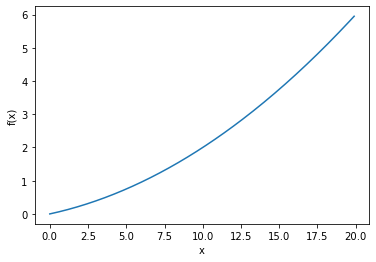

In [136]:
# 例子

def function_1(x):
    return 0.01*x**2 + 0.1*x

import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [139]:
# 计算导数
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

#  在x = 5 和 x = 10处，通过解析解得到的“真的导数”分别为0.2和0.3。

0.1999999999990898
0.2999999999986347


## 偏导数

我们把多个变量的函数的导数称为偏导数。

不过，偏导数需要将多个变量中的某一个变量定为目标变量，并将其他变量固定为某个值。

在下例的代码中，为了将目标变量以外的变量固定到某些特定的值上，我们定义了新函数。

然后，对新定义的函数应用了之前的求数值微分的函数，得到偏导数。

求某个变量x0偏导的时候，实际上和x1没有任何关系。偏导只是代表函数在某个变量上的变化情况（切线斜率）；

In [147]:
# 多元方程式

# 有两个变量x
def function_2(x):
    return x[0]**2 + x[1]**2 # 或者可以写成：return np.sum(x**2)


问题1：求x0 = 3, x1 = 4时，关于x0的偏导数 ${{\partial}f}\over{{\partial}{x_0}}$


In [141]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

问题2：求x0 = 3, x1 = 4时，关于x1的偏导数 ${{\partial}f}\over{{\partial}{x_1}}$


In [143]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 梯度

在刚才的例子中，我们按变量分别计算了x0和x1的偏导数。

如果将两个偏导汇总形成一个值，称为梯度。


In [145]:
# 梯度实现的代码

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组[0,0]，比如这里X[3,4]，说明有两个变量，则由两个方向；
    
    for idx in range(x.size): # 如X[3, 4], idx = 0, 1，迭代两次，分别计算两个方向的梯度值；
        tmp_val = x[idx] # tmp_val = X[0] = 3
        
        # f(x+h)的计算
        x[idx] = tmp_val + h # X[0]=3+h, X变为[3+h, 4]
        fxh1 = f(x) # 算 [3+h, 4]对应的f
        
        # f(x-h)的计算
        x[idx] = tmp_val - h # X为[3-h, 4]
        fxh2 = f(x) # 算 [3-h, 4] 对应的f
        grad[idx] = (fxh1 - fxh2) / (2*h) # 得到梯度
        x[idx] = tmp_val # 还原X为[3, 4]
    
    return grad
    

In [153]:
# 调用
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

# 梯度指示的方向是各点处的函数值减小最多的方向 A。


[6. 8.]
[0. 4.]
[6. 0.]


In [ ]:
# 直接整理成笔记的效率有点慢，还是先以书本和代码理解为主。
# 后续复习的时候再整理笔记。
# 先在书中把关键信息标记下来。


In [154]:
# 梯度下降法实现

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x) # 这里f为损失函数，损失函数是表示error与w的关系表达式，所以这里x实际是w
        x -= lr * grad
    return x

# 参数f是要进行最优化的函数
# init_x是初始值，
# lr是学习率learning rate，
# step_num是梯度法的重复次数

# numerical_gradient(f,x)会求函数的梯度，用该梯度乘以学习率得到的值进行更新操作，
#由step_num指定重复的次数。

In [155]:
# 问题：请用梯度法求 以下的最小值。

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

# 可见最终输出是两个极小值，趋近于(0, 0)，实际最终的结果就是(0, 0)

array([-6.11110793e-10,  8.14814391e-10])

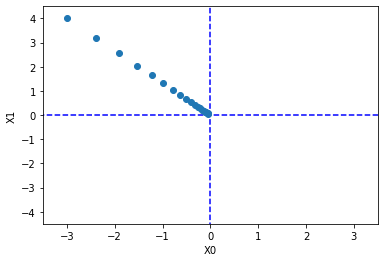

In [159]:
# 所有代码 + 绘图

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组[0,0]
    
    for idx in range(x.size): # 如X[3, 4], idx = 0, 1
        tmp_val = x[idx] # tmp_val = X[0] = 3
        
        # f(x+h)的计算
        x[idx] = tmp_val + h # X[0]=3+h, X变为[3+h, 4]
        fxh1 = f(x) # 算 [3+h, 4]对应的f
        
        # f(x-h)的计算
        x[idx] = tmp_val - h # X为[3-h, 4]
        fxh2 = f(x) # 算 [3-h, 4] 对应的f
        grad[idx] = (fxh1 - fxh2) / (2*h) # 得到梯度
        x[idx] = tmp_val # 还原X为[3, 4]
    
    return grad
    

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [40]:
# 简单的神经网络为例，来实现求梯度的代码

import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        print(y)
        print(t)
        loss = cross_entropy_error(y, t)
        return loss


In [41]:
# simpleNet 简单试用
net = simpleNet()
print(net.W) # 权重参数

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

np.argmax(p) # 最大值的索引
t = np.array([0, 0, 1]) # 正确解标签
net.loss(x, t)


[[-0.78240672 -0.72482534  0.41793289]
 [-0.63161628 -3.13229807  0.09347381]]
[-1.03789868 -3.25396346  0.33488616]


2

[0.19780974 0.02156865 0.7806216 ]
[0 0 1]


0.24766461951233104

In [44]:
net.W

6

In [167]:
# 求一次梯度；
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# 拿过来放在一起看；
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和x形状相同的数组[0,0]
    
    for idx in range(x.size): # 如X[3, 4], idx = 0, 1
        tmp_val = x[idx] # tmp_val = X[0] = 3
        
        # f(x+h)的计算
        x[idx] = tmp_val + h # X[0]=3+h, X变为[3+h, 4]
        fxh1 = f(x) # 算 [3+h, 4]对应的f
        
        # f(x-h)的计算
        x[idx] = tmp_val - h # X为[3-h, 4]
        fxh2 = f(x) # 算 [3-h, 4] 对应的f
        grad[idx] = (fxh1 - fxh2) / (2*h) # 得到梯度
        x[idx] = tmp_val # 还原X为[3, 4]
    
    return grad

[[ 0.0148434   0.52709932 -0.54194272]
 [ 0.0222651   0.79064898 -0.81291408]]


In [ ]:
# 如果将w11增加h，那么损失函数的值会增加0.0148434h
# 如果将w23增加h，损失函数的值将减小0.81291408h

# 因此，w23应向正方向更新，w11应向负方向更新。

In [169]:
# 使用匿名函数
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.0148434   0.52709932 -0.54194272]
 [ 0.0222651   0.79064898 -0.81291408]]


# 学习算法的实现

**前提**

神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面4个步骤。

**步骤1（mini-batch）**
- 从训练数据中随机选出一部分数据，这部分数据称为mini-batch。我们的**目标是减小mini-batch的损失函数的值。**

**步骤2（计算梯度）**
- 为了减小mini-batch的损失函数的值，需要求出各个权重参数的梯度。
- 梯度表示损失函数的值减小最多的方向。

**步骤3（更新参数）**
- 将权重参数沿梯度方向进行微小更新。

**步骤4（重复）**
- 重复步骤1、步骤2、步骤3。


这个方法通过梯度下降法更新参数，不过因为这里使用的数据是随机选择的mini batch数据，所以又称为**随机梯度下降法（stochastic gradient descent）即 SGD**

“随机”指的是“随机选择的”的意思，因此，随机梯度下降法是“对随机选择的数据进行的梯度下降法”。

深度学习的很多框架中，随机梯度下降法一般由一个名为SGD的函数来实现。

## 2层神经网络的类


In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 进行识别（推理）。参数x是图像数据
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    # 梯度计算方法1：使用数值微分计算参数梯度
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    # 梯度计算方法2：使用误差反向传播法计算梯度，计算速度和效率更高，主要解释在第五章。这里可以先试用一下~
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads



In [8]:
# 测试1：
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)


(784, 100)
(100,)
(100, 10)
(10,)


In [7]:
# 测试2：
net.params['W1'][0]

array([-0.00216829,  0.0007936 ,  0.01154547, -0.00216057,  0.00463651,
       -0.01608993,  0.00305349,  0.00720603, -0.00745441,  0.00885699,
       -0.00375359, -0.01125063,  0.00744028, -0.01886311,  0.00330644,
       -0.00861609, -0.00227467,  0.00246719, -0.00443317,  0.01588923,
        0.00462353, -0.00720278, -0.00475903,  0.01240101,  0.00747416,
        0.01395534,  0.00148184, -0.00548888,  0.01372686, -0.00627899,
       -0.00290215,  0.02020959, -0.01598951, -0.00929808,  0.00342375,
       -0.00914613, -0.00426601,  0.00606054, -0.0043018 , -0.02116815,
        0.00917662,  0.01011716, -0.00480541,  0.0012091 ,  0.00839355,
        0.00402102, -0.00058397, -0.00132868, -0.00246013, -0.01172057,
        0.01152795,  0.00067751, -0.01257577, -0.01491646, -0.0100748 ,
       -0.0043892 , -0.00906443, -0.00531301,  0.01666604,  0.00171911,
        0.00169038, -0.01319692, -0.00476881, -0.00337334,  0.00873629,
        0.0038947 , -0.00627986, -0.00364007, -0.00642915,  0.01

In [10]:
# 测试3：
x = np.random.rand(100, 784) # 100个数，每个数像素点为784
y = net.predict(x) # 对100个数做预测
y[0] # 其中第一个数，与0~9数字的相似度概率为以下。（注意：因为这个数据是随机生成的，可以看到几乎每个数字概率都比较近似）


array([0.10217591, 0.08613637, 0.10471816, 0.09698128, 0.10537142,
       0.09283858, 0.10422326, 0.10255708, 0.10217818, 0.10281976])

In [11]:
# 测试4：这里计算还挺久的（预计需要40s+，macbook pro16）
x = np.random.rand(100, 784) # 伪输入数据（100笔）
t = np.random.rand(100, 10) # 伪正确解标签（100笔）
t[0]
grads = net.numerical_gradient(x, t)

grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

array([0.93993426, 0.27323048, 0.56886797, 0.32245466, 0.32710177,
       0.7784457 , 0.21777548, 0.38137328, 0.92405683, 0.17050079])

(784, 100)

(100,)

(100, 10)

(10,)

In [12]:
# 测试5：
grads['W1'][0].shape
grads['W1'][0]


(100,)

array([-9.71643277e-05,  5.25797872e-05,  2.08116382e-04,  1.10831424e-04,
        6.22876706e-05,  7.51264517e-05,  2.63574187e-04, -1.52594350e-04,
        6.10625328e-06, -2.87880475e-05,  1.34774831e-04, -1.08671068e-04,
        2.21205165e-04,  2.83279689e-04,  2.09089512e-04,  9.35860345e-05,
        6.67625977e-05, -3.30307803e-05,  4.71787587e-05,  2.79212409e-04,
       -7.82417020e-05,  1.99070738e-04, -1.08208997e-07,  5.36792832e-08,
        4.03907108e-05,  4.21923785e-05, -7.30472749e-05,  5.04333197e-05,
        2.22778274e-04,  2.92689493e-04,  2.06836910e-04,  3.69767572e-05,
       -6.20431573e-05, -1.09334104e-04, -2.53223906e-04,  6.23804763e-05,
       -6.32461949e-05,  8.70446426e-05, -3.06772829e-04, -1.98454673e-04,
       -4.25438240e-05,  1.23739150e-04, -2.37801518e-04,  1.43266952e-04,
        2.97825142e-04, -5.14560172e-06,  2.08424664e-04,  7.39389217e-06,
       -1.28653626e-04,  5.93797389e-05, -8.32631053e-05, -8.81732487e-05,
        2.34311022e-04, -

## mini-batch的实现


In [14]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 上面的例子用的随机数生成，这里就用了mock的真实场景数据；
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)
train_loss_list = []

# 超参数
iters_num = 100 # 迭代次数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


In [17]:
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size) # 随机取batch_size行的数据，这里取的应该是“第几行”。
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
# 迭代100轮，用gradient速度120ms，用numerical_gradient 计算没算出来。

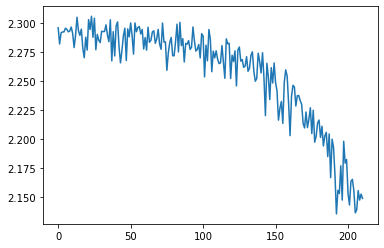

In [19]:
plt.plot(train_loss_list)

## 基于测试数据的评价


In [21]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 平均每个epoch（阶段）的重复次数，其实是要打印出log，每个阶段打印一次log；
iter_per_epoch = max(train_size / batch_size, 1)

# 超参数
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


In [22]:
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
#     grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 高速版!
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09863333333333334, 0.0958
train acc, test acc | 0.7813166666666667, 0.79
train acc, test acc | 0.8777, 0.881
train acc, test acc | 0.8990666666666667, 0.9019
train acc, test acc | 0.90795, 0.9097
train acc, test acc | 0.91285, 0.9148
train acc, test acc | 0.9186666666666666, 0.9184
train acc, test acc | 0.9230833333333334, 0.924
train acc, test acc | 0.9265, 0.9273
train acc, test acc | 0.93015, 0.931
train acc, test acc | 0.9318166666666666, 0.9315
train acc, test acc | 0.9361333333333334, 0.9365
train acc, test acc | 0.93715, 0.9384
train acc, test acc | 0.9408333333333333, 0.9391
train acc, test acc | 0.9427166666666666, 0.9414
train acc, test acc | 0.9446, 0.9418
train acc, test acc | 0.9463166666666667, 0.9437
